In [ ]:
# from dataclasses import dataclass
from datetime import timedelta, datetime
# import asyncio
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
# import re
import math
import json
# from dacite import from_dict

(99, 4)


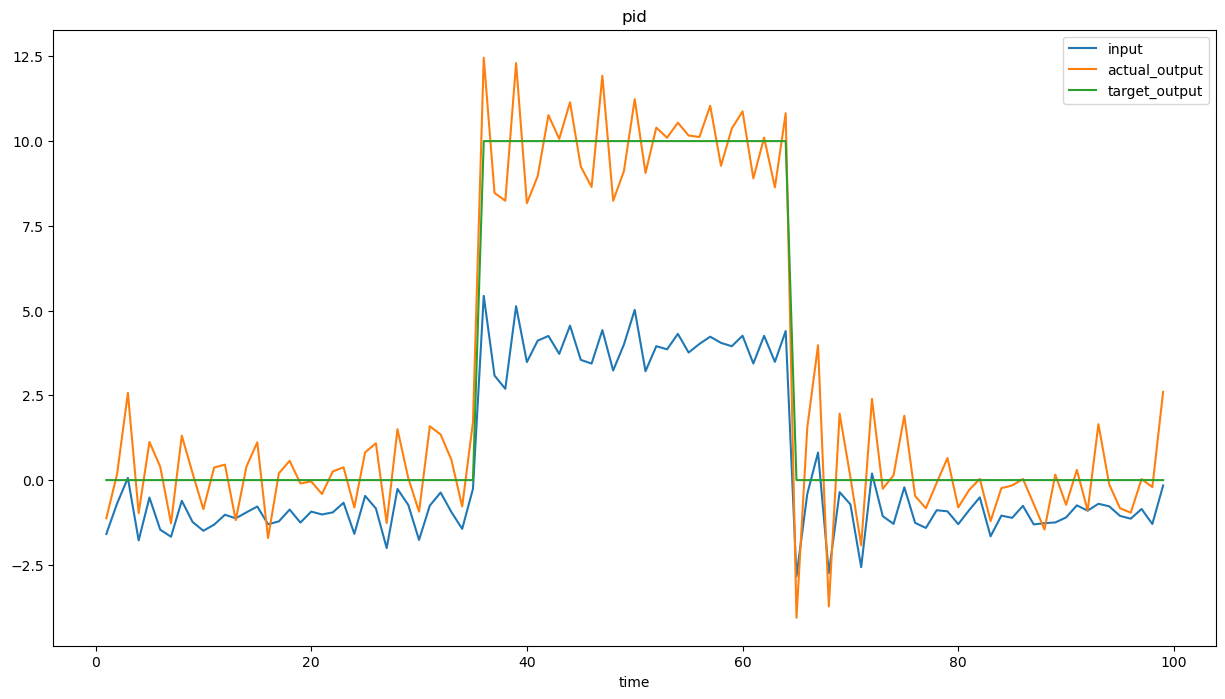

In [ ]:
def plot(name, file):
    data = pd.read_json(file, lines=True)

    fig, ax = plt.subplots(figsize=(15, 8))
    print(data.shape)
    ax.plot(data['time'], data['input'], label='input')
    ax.plot(data['time'], data['actual_output'], label='actual_output')
    ax.plot(data['time'], data['target_output'], label='target_output')
    ax.legend()
    ax.set_xlabel('time')
    ax.set_title(name)
    plt.show()
    
plot('pid', '../abstract_pid/json_data.json')

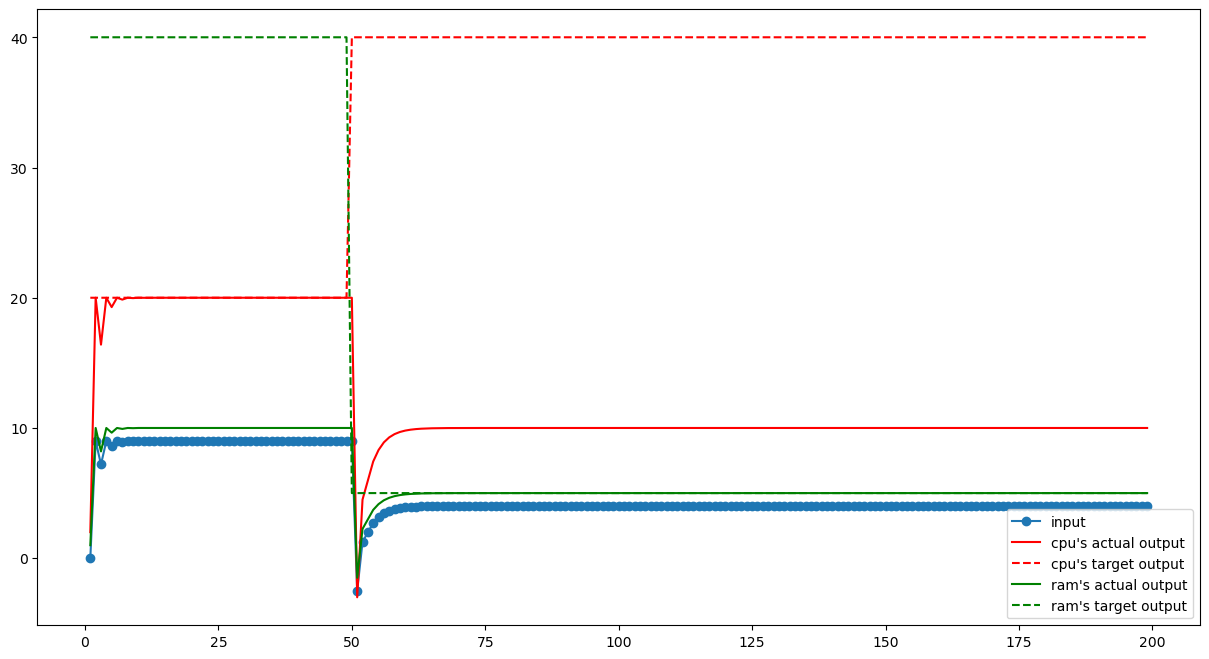

In [29]:
def read_json_lines(file) -> list[dict]:
    with open(file, mode='r') as f:
        lines = [json.loads(line) for line in f.readlines()]
        return lines

def plot_multiple(file):
    data = read_json_lines(file)
    
    record = data[0]
    outputs = list(filter(lambda name: name not in ['input', 'time'], record))
    
    actual_outputs = {name: [record[name]['output'] for record in data] for name in outputs}
    target_outputs = {name: [record[name]['target_output'] for record in data] for name in outputs}
    times = [record['time'] for record in data]
    inputs = [record['input'] for record in data]
    
    fig, ax = plt.subplots(figsize=(15, 8))
    colors = ['red', 'green', 'brown']
    ax.plot(times, inputs, marker='o', label='input')
    for color, name in zip(colors, outputs):
        ax.plot(times, actual_outputs[name], color=color, linestyle='-', label=f"{name}'s actual output")
        ax.plot(times, target_outputs[name], color=color, linestyle='--', label=f"{name}'s target output")
    
    ax.legend()
    # fig, ax = plt.subplots(figsize=(15, 8))
    # ax.plot(data['time'], data['input'], label='input')
    # ax.plot(data['time'], data['actual_output'], label='actual_output')
    # ax.plot(data['time'], data['target_output'], label='target_output')
    # ax.legend()
    # ax.set_xlabel('time')
    # ax.set_title('multiple values control')
    # plt.show()
    
plot_multiple('../abstract_pid/multipid_test.json')

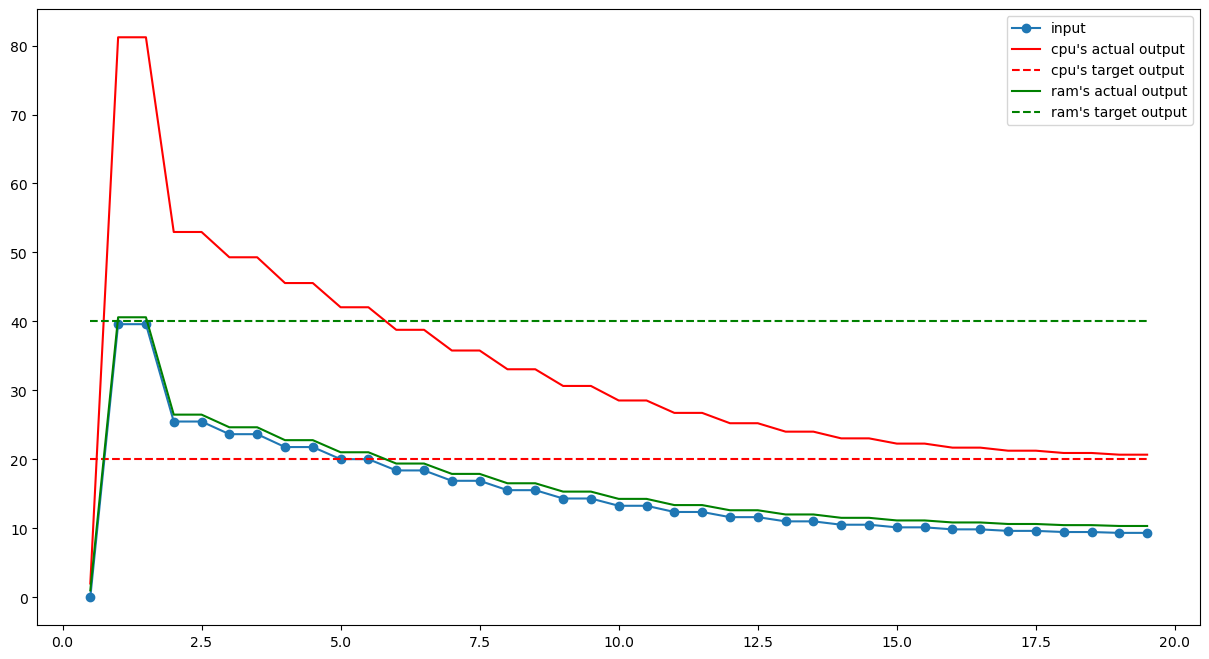

In [46]:
plot_multiple('../abstract_pid/aggregating_test.json')